<a href="https://colab.research.google.com/github/Aniket658/GN22CDBDS001_2159919/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [11]:
# Reading the data
data = pd.read_csv("https://raw.githubusercontent.com/a-forty-two/COG_GN22CDBDS001_MARCH_22/main/breastcancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [12]:
# Output Label

y = data.diagnosis
y

0       M
1       M
2       M
3       M
4       M
       ..
1133    M
1134    M
1135    M
1136    M
1137    B
Name: diagnosis, Length: 1138, dtype: object

In [13]:
# Input Features

X = data.drop(["id","diagnosis"], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...
1133,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


In [15]:
# Normalizing the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.65287398e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
        -2.38458552e-02,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         1.36347845e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         4.65875327e-02, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         3.29694400e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.11487284e+00, -8.20069901e-01, -5.61032377e-01]])

In [17]:
# Converting output label 'M', 'D' to '1', '0' using LabelEncoder

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
 
y = label_encoder.fit_transform(y)
 
y

array([1, 1, 1, ..., 1, 1, 0])

In [18]:
# Splitting data in train and test set

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [20]:
# Random Forest Classifier Model

forest = RandomForestClassifier()
forest.fit(X_train, y_train) # Training Model

RandomForestClassifier()

In [21]:
# Model Prediction

y_pred_test = forest.predict(X_test)

In [22]:
# Model Accuracy

accuracy_score(y_test, y_pred_test)

0.9946808510638298

In [23]:
confusion_matrix(y_test, y_pred_test)

array([[240,   0],
       [  2, 134]])

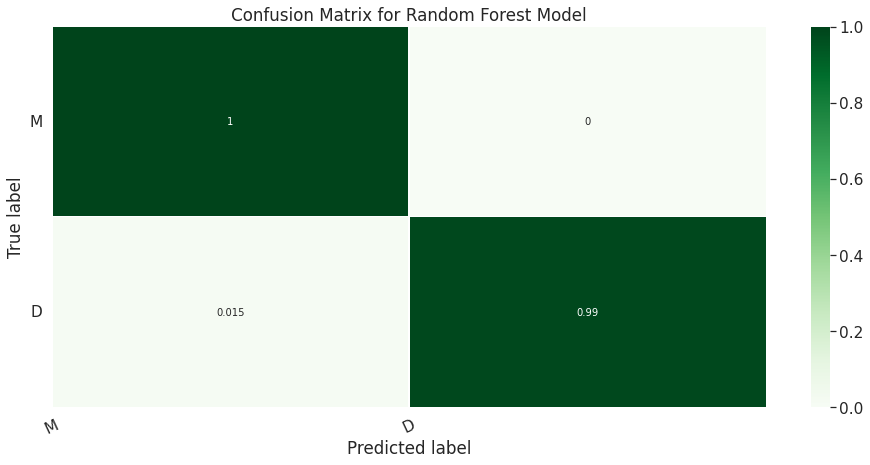

In [24]:
# Confusion Matrix Plot

matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['M','D']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()